In [45]:
# ----------- REGRESSION (Delivery_Time) -----------

X_reg = df_encoded.drop('Delivery_Time', axis=1)
y_reg = df_encoded['Delivery_Time']

# Train-Test Split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Scaling
scaler_reg = StandardScaler()
X_train_reg = scaler_reg.fit_transform(X_train_reg)
X_test_reg = scaler_reg.transform(X_test_reg)


In [46]:
lr_model = LinearRegression()
lr_model.fit(X_train_reg, y_train_reg)

y_pred_lr = lr_model.predict(X_test_reg)

mse_lr = mean_squared_error(y_test_reg, y_pred_lr)
mae_lr = mean_absolute_error(y_test_reg, y_pred_lr)
r2_lr = r2_score(y_test_reg, y_pred_lr)

print("Linear Regression Results")
print("MSE:", mse_lr)
print("MAE:", mae_lr)
print("R²:", r2_lr)


Linear Regression Results
MSE: 302.6907362109464
MAE: 15.292396856900165
R²: 0.6727282807725714


In [47]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)

y_pred_rf_reg = rf_reg.predict(X_test_reg)

mse_rf = mean_squared_error(y_test_reg, y_pred_rf_reg)
mae_rf = mean_absolute_error(y_test_reg, y_pred_rf_reg)
r2_rf = r2_score(y_test_reg, y_pred_rf_reg)

print("\nRandom Forest Regression Results")
print("MSE:", mse_rf)
print("MAE:", mae_rf)
print("R²:", r2_rf)



Random Forest Regression Results
MSE: 245.17992500424998
MAE: 13.354517499999996
R²: 0.7349094439405869


In [48]:
# ----------- CLASSIFICATION (Delivery_Status) -----------

median_time = df['Delivery_Time'].median()

df_encoded['Delivery_Status'] = df['Delivery_Time'].apply(
    lambda x: 1 if x > median_time else 0
)

X_clf = df_encoded.drop(['Delivery_Time', 'Delivery_Status'], axis=1)
y_clf = df_encoded['Delivery_Status']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42
)

scaler_clf = StandardScaler()
X_train_clf = scaler_clf.fit_transform(X_train_clf)
X_test_clf = scaler_clf.transform(X_test_clf)


In [49]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_clf, y_train_clf)

y_pred_log = log_model.predict(X_test_clf)

accuracy_log = accuracy_score(y_test_clf, y_pred_log)
precision_log = precision_score(y_test_clf, y_pred_log)
recall_log = recall_score(y_test_clf, y_pred_log)
f1_log = f1_score(y_test_clf, y_pred_log)

y_prob_log = log_model.predict_proba(X_test_clf)[:,1]
fpr, tpr, _ = roc_curve(y_test_clf, y_prob_log)
roc_auc_log = auc(fpr, tpr)

print("\nLogistic Regression Results")
print("Accuracy:", accuracy_log)
print("Precision:", precision_log)
print("Recall:", recall_log)
print("F1 Score:", f1_log)
print("ROC-AUC:", roc_auc_log)



Logistic Regression Results
Accuracy: 0.425
Precision: 0.45454545454545453
Recall: 0.47619047619047616
F1 Score: 0.46511627906976744
ROC-AUC: 0.3634085213032581


In [50]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_clf, y_train_clf)

y_pred_rf_clf = rf_clf.predict(X_test_clf)

accuracy_rf = accuracy_score(y_test_clf, y_pred_rf_clf)
precision_rf = precision_score(y_test_clf, y_pred_rf_clf)
recall_rf = recall_score(y_test_clf, y_pred_rf_clf)
f1_rf = f1_score(y_test_clf, y_pred_rf_clf)

print("\nRandom Forest Classification Results")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)



Random Forest Classification Results
Accuracy: 0.4
Precision: 0.43478260869565216
Recall: 0.47619047619047616
F1 Score: 0.45454545454545453


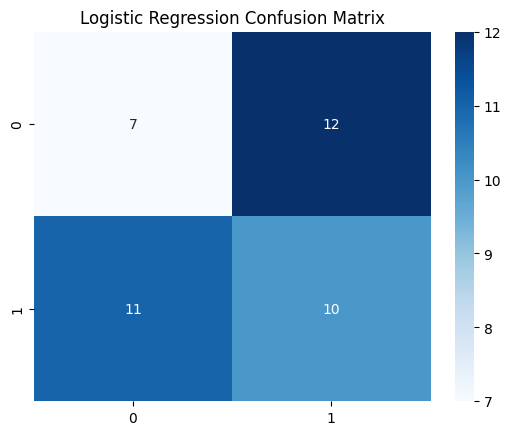

In [51]:
cm = confusion_matrix(y_test_clf, y_pred_log)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


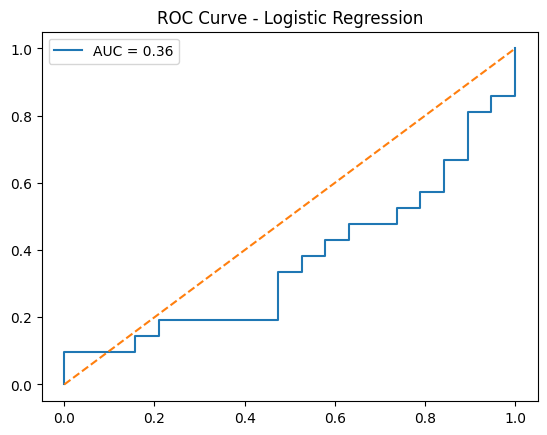

In [52]:
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_log:.2f}")
plt.plot([0,1], [0,1], '--')
plt.legend()
plt.title("ROC Curve - Logistic Regression")
plt.show()


In [53]:
print("\nModel Comparison Summary")

print("\nLinear Regression R²:", r2_lr)
print("Random Forest Regression R²:", r2_rf)

print("\nLogistic Regression ROC-AUC:", roc_auc_log)
print("Random Forest Classification Accuracy:", accuracy_rf)

if r2_rf > r2_lr:
    print("\nRandom Forest improves regression performance.")

if accuracy_rf > accuracy_log:
    print("Random Forest improves classification performance.")



Model Comparison Summary

Linear Regression R²: 0.6727282807725714
Random Forest Regression R²: 0.7349094439405869

Logistic Regression ROC-AUC: 0.3634085213032581
Random Forest Classification Accuracy: 0.4

Random Forest improves regression performance.
